In [16]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.interpolate import CubicSpline

In [17]:
nufit.make_LambdaCDM_Pk("LambdaCDM")

In [18]:
nufit.v_masses_std(0.1, True, "100meV")

Text(0, 0.5, '$\\Delta P / P$')

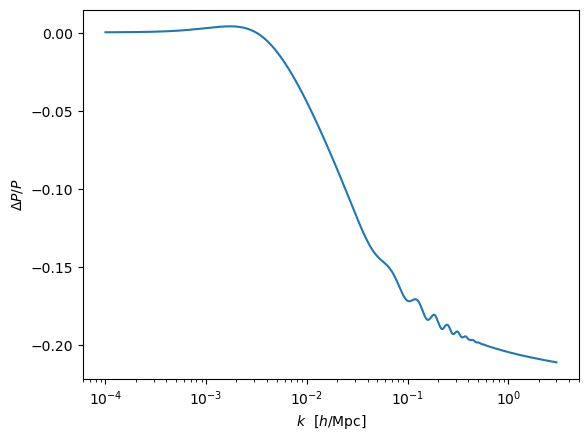

In [19]:
nu = np.load("100meV.npz", allow_pickle=True)
LCDM = np.load("LambdaCDM.npz", allow_pickle=True)
plt.figure()
plt.semilogx(nu['k_n_array'], (nu['Pk_n_array']-LCDM['Pk_LambdaCDM'])/LCDM['Pk_LambdaCDM'])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$\Delta P / P$')

``v_masses_sterile(m_small, normal, input_file, output_file, make_plot=False, sum_mnu_filename=False)``
- m_small: least neutrino mass (in eV)
- normal: (True/False): normal hierarchy?
- input_file: the .npz file that has results from Rasmussen et al
- output_file: will create an output file named output_file.npz
- ``make_plot=False`` optional argument, if True, it creates the $\Delta P/P$ vs. $k$ plot
- ``sum_mnu_filename=False`` optional argument, if True it appends the $\Sum m_nu$ in meV.

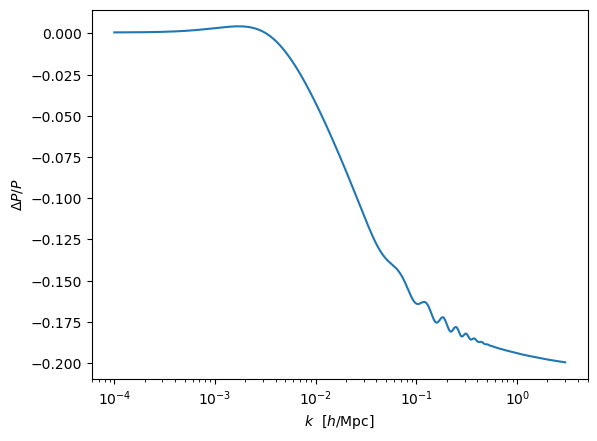

CPU times: user 28.9 s, sys: 225 ms, total: 29.1 s
Wall time: 4.24 s


In [20]:
%%time
nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.040.npz", "test", make_plot=True, sum_mnu_filename=True)
model = np.load("test312.npz", allow_pickle = True)

In [21]:
model.files

['n_results',
 'LCDM_results',
 'k_array',
 'Pk_n_array',
 'Pk_L_array',
 'normal_hierarchy',
 'm1',
 'm2',
 'm3',
 'm_small',
 'sum_nu']

In [22]:
model['n_results'].item()

{'age': 13.772638746970905,
 'Neff': 2.956163012840433,
 'omega_b': 0.0223828,
 'Omega0_cdm': 0.2542140270305442,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.309882798263016,
 'Omega_b': 0.048677349798108865,
 'Omega_g': 5.378150968509925e-05,
 'Omega_lambda': 0.6900631754903149,
 'Omega_m': 0.309882798263016,
 'Omega_r': 5.402624666912535e-05,
 'rs_drag': 148.318236709259,
 'Sigma8': 0.7572267679809024,
 'Sigma8_cb': 0.7724286740846442,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0495433839613537,
 'theta_star_100': 1.051943496669767,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [23]:
model['LCDM_results'].item()

{'age': 13.770662412204299,
 'Neff': 2.956163012840433,
 'omega_b': 0.0223828,
 'Omega0_cdm': 0.26120569320189113,
 'h': 0.6781,
 'Omega0_k': 0.0,
 'Omega0_m': 0.30988304299999997,
 'Omega_b': 0.048677349798108865,
 'Omega_g': 5.378150968509925e-05,
 'Omega_lambda': 0.6900270683997085,
 'Omega_m': 0.30988304299999997,
 'Omega_r': 8.988860029147636e-05,
 'rs_drag': 147.51564215625683,
 'Sigma8': 0.8306245465206434,
 'Sigma8_cb': 0.8306245465206434,
 'T_cmb': 2.7255,
 'theta_s_100': 1.0449194040335477,
 'theta_star_100': 1.047276167672887,
 'n_s': 0.9660499,
 'tau_reio': 0.05430842}

In [69]:
masses = np.linspace(0.05, 0.45, 20)

def mps_diff_ster(mass_val, input_file):
    name = f"small_mnu:{mass_val}"
    nufit.v_masses_sterile(mass_val, True, input_file, name)
    nu_out = np.load(f"{name}.npz", allow_pickle=True)
    
    return nu_out

def mps_diff_std(mass_val, plot):
    name = f"{mass_val}meV"
    nufit.v_masses_std(mass_val, True, name)
    nu_mass_val = np.load(f"{name}.npz", allow_pickle=True)

    if plot == True:
        plt.figure()
        plt.semilogx(nu_mass_val['k_n_array'], (nu_mass_val['Pk_n_array']-LCDM['Pk_LambdaCDM'])/LCDM['Pk_LambdaCDM'])
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
        plt.ylabel(r'$\Delta P / P$')
        plt.title(f"Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = {mass_val*1000} meV and $M_ν$ = 0")

    return nu_mass_val

In [70]:
mass_ster = np.zeros(len(masses))
deltap_ster = np.zeros(len(masses))
input_file = "RMFK_Results/mass-300-life-0.040.npz"

for i in range(len(masses)):
    val = masses[i]
    file = mps_diff_ster(val, input_file)

    mass_ster[i] = file['sum_nu']
    deltap_ster[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

nts for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.985388
 -> age = 13.772762 Gyr
 -> conformal age = 14178.433482 Mpc
 -> N_eff = 2.95616 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3271.759456
    corresponding to conformal time = 118.576710 Mpc
Running CLASS version v3.3.0
Computing background
 -> age = 13.770662 Gyr
 -> conformal age = 14153.469490 Mpc
 -> N_eff = 2.95616 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3446.412035
    corresponding to conformal time = 112.056168 Mpc
Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 4.289474e-01 eV (so m_i / omega_i =9.314322e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -

Text(0, 0.5, '$\\Delta P / P$')

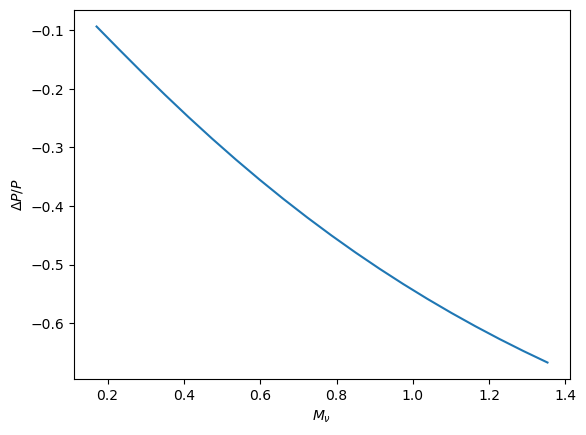

In [26]:
plt.figure()
plt.plot(mass_ster, deltap_ster)
plt.xlabel('$M_ν$')
plt.ylabel(r'$\Delta P / P$')

In [71]:
mass_std = np.zeros(len(masses))
deltap_std = np.zeros(len(masses))

for i in range(len(masses)):
    mass_val = masses[i]
    std_file = mps_diff_std(mass_val, False)
    
    mass_std[i] = std_file['sum_nu']
    deltap_std[i] = ((std_file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

2.95616 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3446.412035
    corresponding to conformal time = 112.056168 Mpc
Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 4.500000e-01 eV (so m_i / omega_i =9.704482e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 6) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.985388
 -> non-cold dark matter species with i=2 has m_i = 4.500822e-01 eV (so m_i / omega_i =9.704482e+01 eV)
 -> ncdm species i=2 sampled with 11 (resp. 6) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.985388
 -> non-cold dark matter species with i=3 has m_i = 4.527229e-01 eV (so m_i / omega_i =9.704482e+01 eV)
 -> ncdm species i=3 sampled with 11 (resp. 6) points for purpose of background (resp. perturbation) integration. In

Text(0, 0.5, '$\\Delta P / P$')

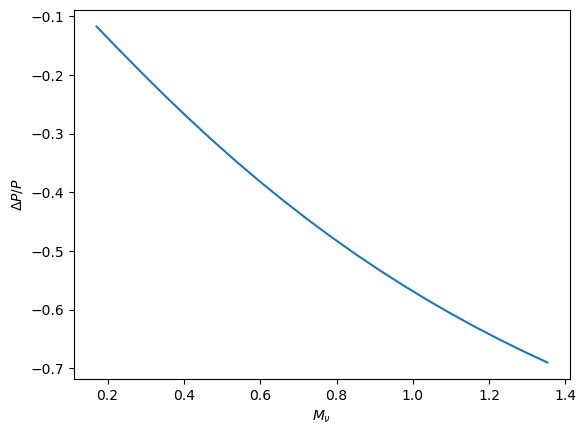

In [72]:
plt.figure()
plt.plot(mass_std, deltap_std)
plt.xlabel('$M_ν$')
plt.ylabel(r'$\Delta P / P$')

In [73]:
def cubic_spline(x, y, plot):
    f = CubicSpline(x, y, bc_type='natural')
    x_new = np.linspace(x[0], x[-1], 100)
    y_new = f(x_new)

    if plot == True:
        plt.plot(x_new, y_new, 'black')
        plt.plot(x, y, 'bo')
        plt.xlabel('Standard $M_ν$')
        plt.ylabel('Sterile $M_ν$')
        plt.show()
    
    return f 

In [91]:
std_fun = cubic_spline(np.flip(deltap_std), np.flip(mass_std), False)

In [92]:
stdm_from_sterp = np.zeros(len(deltap_ster))

for i in range(len(deltap_ster)):
    stdm_from_sterp[i] = std_fun(deltap_ster[i])

Text(0, 0.5, '$M_ν$')

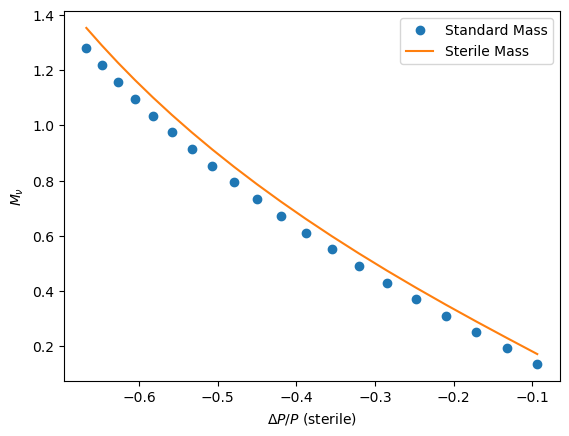

In [97]:
plt.figure()
plt.plot(deltap_ster, stdm_from_sterp, 'o', label = 'Standard Mass')
plt.plot(deltap_ster, mass_ster, label = 'Sterile Mass')
plt.legend()
plt.xlabel(r'$\Delta P / P$ (sterile)')
plt.ylabel('$M_ν$')

This takes some time to run. Avoid running it unless you've got some time to kill.

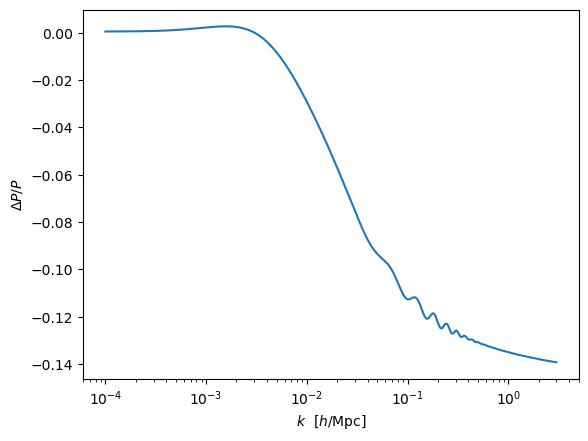

CPU times: user 10min 41s, sys: 3.26 s, total: 10min 45s
Wall time: 49.3 s


In [5]:
%%time
#nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.221.npz", "test", make_plot=True, sum_mnu_filename=True)

In [9]:
std_mnu2 = np.zeros(len(masses))
ster_mnu2 = np.zeros(len(masses))
input_file2 = "RMFK_Results/mass-300-life-0.221.npz"

for i in range(len(masses)):
    mass_val = masses[i]
    std_file2 = mps_diff_std(mass_val, False)
    ster_file2 = mps_diff_ster(mass_val, input_file2)

    std_mnu2[i] = std_file2['sum_nu']
    ster_mnu2[i] = ster_file2['sum_nu']

Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 5.000000e-02 eV (so m_i / omega_i =9.313649e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=2 has m_i = 5.073460e-02 eV (so m_i / omega_i =9.313669e+01 eV)
 -> ncdm species i=2 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=3 has m_i = 7.041307e-02 eV (so m_i / omega_i =9.313987e+01 eV)
 -> ncdm species i=3 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> age = 13.772540 Gyr
 -> conformal age = 14163.749690 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativisti

This takes a really long time. Don't run it.

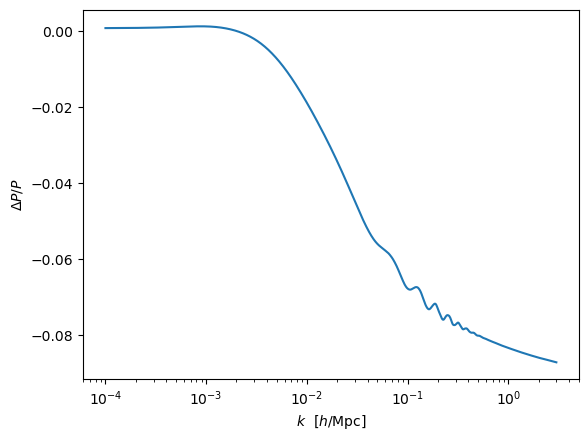

CPU times: user 3h 31min 1s, sys: 56.7 s, total: 3h 31min 58s
Wall time: 16min 15s


In [21]:
%%time
#nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.912.npz", "test", make_plot=True, sum_mnu_filename=True)

In [61]:
std_mnu3 = np.zeros(len(masses))
ster_mnu3 = np.zeros(len(masses))
input_file3 = "RMFK_Results/mass-300-life-0.912.npz"

for i in range(len(masses)):
    mass_val = masses[i]
    std_file3 = mps_diff_std(mass_val, False)
    ster_file3 = mps_diff_ster(mass_val, input_file2)

    std_mnu3[i] = std_file3['sum_nu']
    ster_mnu3[i] = ster_file3['sum_nu']

s i=1 sampled with 48 (resp. 36) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.824054
 -> non-cold dark matter species with i=2 has m_i = 4.500822e-01 eV (so m_i / omega_i =1.430943e+02 eV)
 -> ncdm species i=2 sampled with 48 (resp. 36) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.824054
 -> non-cold dark matter species with i=3 has m_i = 4.527229e-01 eV (so m_i / omega_i =1.430943e+02 eV)
 -> ncdm species i=3 sampled with 48 (resp. 36) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.824054
 -> age = 13.772749 Gyr
 -> conformal age = 14181.596617 Mpc
 -> N_eff = 2.47216 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3548.529121
    corresponding to conformal time = 112.974155 Mpc
Running CLASS version v3.3.0
Computin